# Applied Data Visualization – Homework 1
*https://www.dataviscourse.net/2023-applied/*

In this homework, you will review and visualize data from the Utah Avalanche Center https://utahavalanchecenter.org/observations

# Your info

*First name:*

*Last name:*

*Email:*

*UID*

In [52]:
# the standard input statements
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Part 1: Load in data

Load in the provided file `avalanches.csv` using the Pandas `read_csv` function.

Print a couple of rows to get a sense of the data.

In [53]:
# your code here
avy_df = pd.read_csv('./avalanches.csv')
avy_df.head()

,Date,Region,Place,Trigger,Trigger: additional info,Weak Layer,Depth,Width,Vertical,Aspect,...,Buried - Fully,Injured,Killed,Accident and Rescue Summary,Terrain Summary,Weather Conditions and History,Comments 1,Comments 2,Comments 3,Comments 4
0,11/9/2012,Salt Lake,Sunset Peak,Snowboarder,Unintentionally Triggered,New Snow/Old Snow Interface,"14""",80',30',North,...,NaN,NaN,NaN,NaN,NaN,NaN,While it was a small avalanche that was I caug...,NaN,NaN,NaN
1,11/10/2012,Salt Lake,Pioneer Ridge,Skier,Remotely Triggered,Facets,2',20',125',North,...,NaN,NaN,NaN,NaN,NaN,NaN,Directly above cat track leading to lift. Cat...,NaN,NaN,NaN
2,11/10/2012,Salt Lake,Pioneer Bowl,Natural,NaN,Facets,NaN,NaN,NaN,North,...,NaN,NaN,NaN,NaN,NaN,NaN,"Looked and felt like winter today, nice to be ...",NaN,NaN,NaN
3,11/11/2012,Salt Lake,Patsy Marly,Skier,Unintentionally Triggered,New Snow/Old Snow Interface,2.5',100',100',North,...,NaN,NaN,NaN,NaN,NaN,NaN,A North facing aspect with an exposed ridge in...,NaN,NaN,NaN
4,11/11/2012,Salt Lake,Two Dogs,Skier,Remotely Triggered,Facets,3',70',450',North,...,NaN,NaN,NaN,NaN,NaN,NaN,Remotely triggered all the new storm snow (abo...,NaN,NaN,Additional comments by another backcountry obs...


## Part 2: Clean dates

You may notice that the dates of avalanches are provided in the `Date` column, however they are encoded as a string.

Additionally, we may want to analyze avalanches by year and by month, so let's create separate columns for those.

1. Convert the Date column to datetime format
2. Create a new column Year
3. Create a new column Month

In [54]:
# your code here

avy_df['Date'] = pd.to_datetime(avy_df['Date'])
avy_df['Year'] = avy_df['Date'].dt.year.astype('Int64')
avy_df['Month'] = avy_df['Date'].dt.month.astype('Int64')
avy_df[['Date', 'Year', 'Month']]

,Date,Year,Month
0,2012-11-09,2012,11
1,2012-11-10,2012,11
2,2012-11-10,2012,11
3,2012-11-11,2012,11
4,2012-11-11,2012,11
...,...,...,...
7558,2023-05-09,2023,5
7559,2023-05-21,2023,5
7560,2023-05-20,2023,5
7561,2023-06-06,2023,6


## Part 3: Cleaning up Numerical Columns

You may also notice that numerical columns (`Elevation`, `Depth`, `Width`, `Vertical`) are encoded as strings. Moreover, some are in feet ('), while others are in inches (").

First, create a new column Elevation_Feet, with the Elevation column converted to a number, in feet

In [55]:
# your code here
avy_df['Elevation_Feet'] = pd.to_numeric(avy_df['Elevation'].str.replace('\'', '').str.replace(',', ''))
avy_df[['Elevation', 'Elevation_Feet']]

,Elevation,Elevation_Feet
0,"10,400'",10400.0
1,"9,900'",9900.0
2,"9,700'",9700.0
3,"9,700'",9700.0
4,"10,200'",10200.0
...,...,...
7558,"9,600'",9600.0
7559,"10,700'",10700.0
7560,"10,700'",10700.0
7561,"10,900'",10900.0


Then, create three new columns in inches: 
   1. Depth_Inches, with the Depth column converted to a number, in inches
   2. Width_Inches, with the Width column converted to a number, in inches
   3. Vertical_Inches, with the Vertical column converted to a number, in inches

We recommend that you write a function that converts the string into a number and then use that function to clean up the columns. Note that you will also have to handle undefined (NaN) values.

In [56]:
# your code here

def CleanInchesFeet(x):
    # if x is NaN, return NaN
    if x!=x: return x

    # remove the last character (the unit) with the list comprehension, and take out the comma
    number = pd.to_numeric(x[:-1].replace(',', ''))
    unit = x[-1]

    # if the unit is inches, return the number as inches unchaged, if feet multiply by 12 and return
    if unit == '\"':
        return number
    elif unit == '\'':
        return number*12
    else:
        return float('NaN')

# apply this function to the columns    
avy_df['Depth_Inches'] = avy_df['Depth'].map(lambda x: CleanInchesFeet(x))
avy_df['Width_Inches'] = avy_df['Width'].map(lambda x: CleanInchesFeet(x))
avy_df['Vertical_Inches'] = avy_df['Vertical'].map(lambda x: CleanInchesFeet(x))

# just look at the columns we want
avy_df[['Depth', 'Depth_Inches', 'Width', 'Width_Inches', 'Vertical', 'Vertical_Inches']]

,Depth,Depth_Inches,Width,Width_Inches,Vertical,Vertical_Inches
0,"14""",14.0,80',960.0,30',360.0
1,2',24.0,20',240.0,125',1500.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,2.5',30.0,100',1200.0,100',1200.0
4,3',36.0,70',840.0,450',5400.0
...,...,...,...,...,...,...
7558,10',120.0,NaN,NaN,NaN,NaN
7559,"4""",4.0,20',240.0,NaN,NaN
7560,"2""",2.0,25',300.0,NaN,NaN
7561,NaN,NaN,15',180.0,NaN,NaN


## Part 4: Plotting

4.1: Plot a histogram of the Depth_Inches variable using the built-in pandas plotting function. 

<Axes: ylabel='Frequency'>

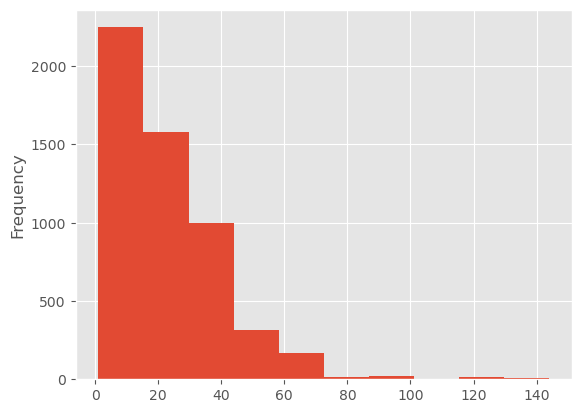

In [57]:
# your code here
avy_df['Depth_Inches'].plot(kind = 'hist')

4.2: Then plot a histogram of the elevation in feet variable.

<Axes: ylabel='Frequency'>

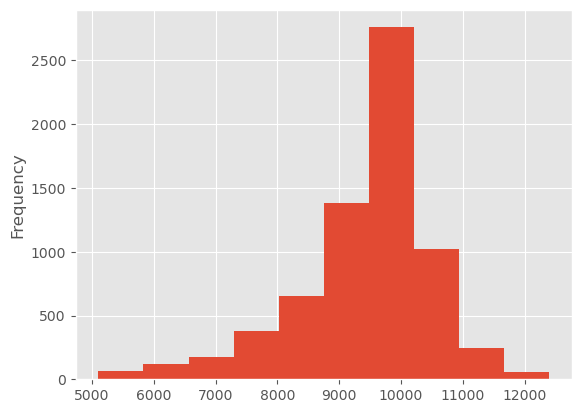

In [58]:
# your code here
avy_df['Elevation_Feet'].plot(kind = 'hist')

4.3: Next, plot a bar chart of the number of avalances by year
(Hint: You may find it useful to create a separate data frame, grouped by year.)

    Year  Count
0   1914      1
1   1941      1
2   1958      1
3   1964      1
4   1965      1
5   1967      1
6   1968      1
7   1970      1
8   1973      1
9   1976      1
10  1977      1
11  1979      2
12  1980      2
13  1981      2
14  1982      1
15  1984      1
16  1985      3
17  1986      6
18  1987      1
19  1989      1
20  1992      2
21  1993      3
22  1994      2
23  1995      3
24  1996      4
25  1997      3
26  1998      4
27  1999      3
28  2000      2
29  2001      3
30  2002      2
31  2003      2
32  2004      5
33  2005      9
34  2006      3
35  2007     11
36  2008      7
37  2009     71
38  2010    658
39  2011    396
40  2012    433
41  2013    346
42  2014    480
43  2015    293
44  2016    371
45  2017    417
46  2018    389
47  2019    626
48  2020    558
49  2021    842
50  2022    623
51  2023    932


<Axes: xlabel='Year'>

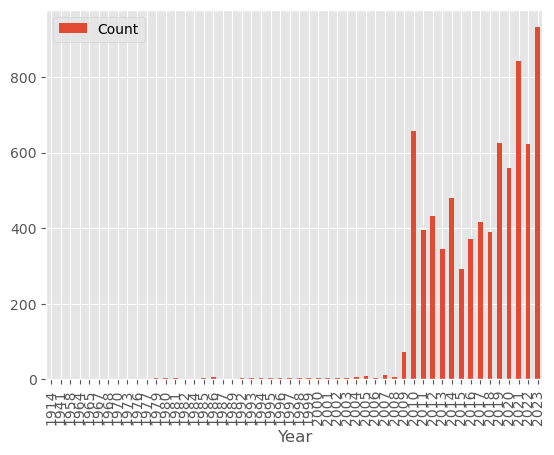

In [59]:
# your code here

# group by year and aggregate by count
avy_df_grouped_year = avy_df.groupby(['Year']).size().reset_index(name="Count")
print(avy_df_grouped_year)
avy_df_grouped_year.plot(kind = 'bar', x = 'Year', y = 'Count')

4.4: Once you have done that, you will see that the Utah Avalanche Center does not have complete data for earlier years. Let's filter them out to see the barchart more clearly

<Axes: xlabel='Year'>

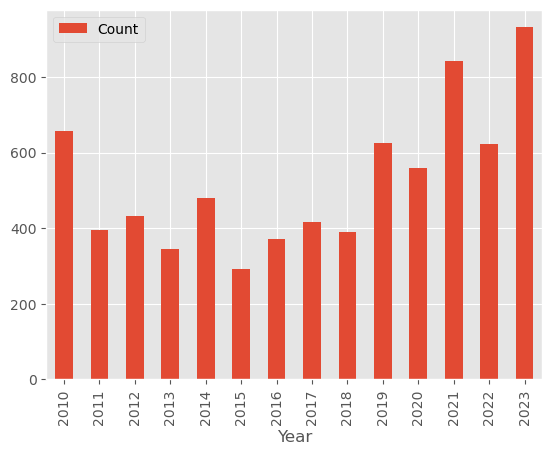

In [60]:
avy_df_grouped_year = avy_df_grouped_year[avy_df_grouped_year['Year']>=2010]
avy_df_grouped_year.plot(kind = 'bar', x = 'Year', y = 'Count')

4.5: Create a barchart of the number of avalanches per month
(Hint: You may find it useful to create a separate data frame, grouped by month.)

<Axes: xlabel='Month'>

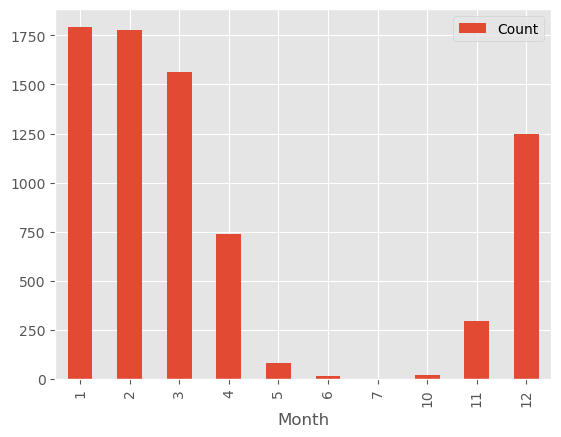

In [61]:
avy_df_grouped_month = avy_df.groupby(['Month']).size().reset_index(name="Count")
avy_df_grouped_month.plot(kind = 'bar', x = 'Month', y = 'Count')

4.6: Create a boxplot of the elevation of avalances by month

<Axes: title={'center': 'Elevation_Feet'}, xlabel='Month'>

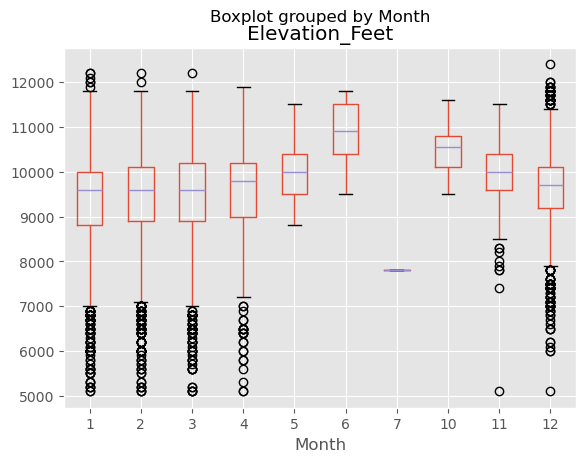

In [62]:
avy_df.boxplot(column='Elevation_Feet', by='Month')

4.6:  Create a horizontal barchart of the number of avalanches by trigger

(Hint: You may find it useful to create a separate data frame, grouped by trigger.)

<Axes: ylabel='Trigger'>

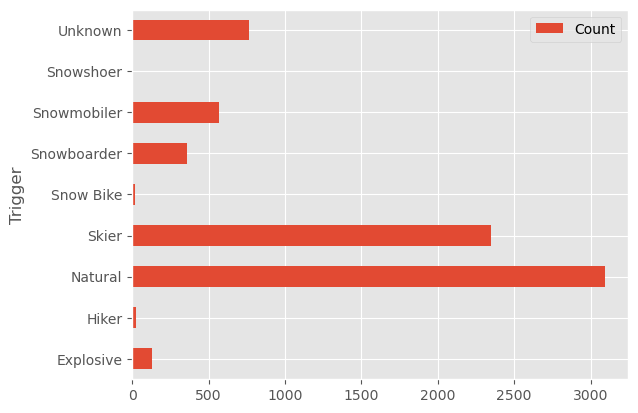

In [63]:
# your code here
avy_df_grouped_trigger = avy_df.groupby(['Trigger']).size().reset_index(name="Count")
avy_df_grouped_trigger.plot(kind = 'barh', x = 'Trigger', y = 'Count')

4.7: Create a boxplot of the depth of avalances by trigger

<Axes: title={'center': 'Depth_Inches'}, ylabel='Trigger'>

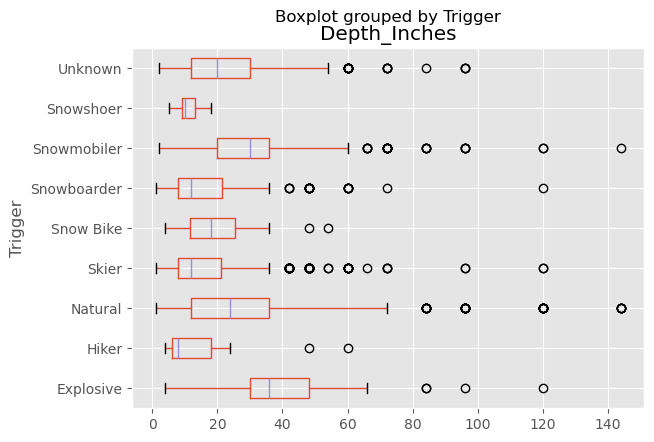

In [64]:
avy_df.boxplot(column='Depth_Inches', by='Trigger', vert=False)

# Part 5: Analysis – What did we learn?
Please answer the following questions in (brief) writing.

- What does the distribution of avalanche depths and elevations look like? 
- What year had the most avalanches? How many?
- What month had the most avalanches? How many?
- What month gets the highest elevation avalanches? How many feet, on average?
- What is the most common avalanche trigger?
- What avalanche trigger yields the deepest avalanches? How many inches deep, on average?

Your Answer Here!


# Part 6: Bonus – Are Avalanches with Fatalities Different?

Compare avalanches without and with fatalities using visualziations. Are there any differences you notice?#

# Grading Scheme

Part 1: 5%  
Part 2: 15%  
Part 3: 25%  
Part 4: 40%, 5% per sub-itme  
Part 5: 15%  
Part 6 (Bonus): 10%  